In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

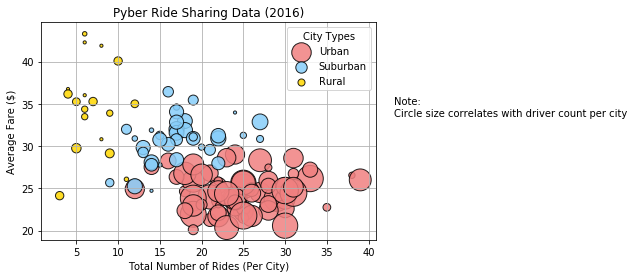

In [20]:
# Obtain the x and y coordinates for each of the three city types
grouped_pyber_df = pyber_df.groupby(["type", "city"])
grouped_pyber_df.count()

# Average Fare ($) Per City
Average_Fare = grouped_pyber_df["fare"].mean()

# Total Number of Rides Per City
Num_Rides = grouped_pyber_df["ride_id"].count()

# Total Number of Drivers Per City
Num_Drivers = grouped_pyber_df["driver_count"].sum()/Num_Rides

# Create dataframe to easily see data as needed
Pyber_Summary_df = pd.DataFrame(Average_Fare)
Pyber_Summary_df["Total Number of Rides Per City"] = Num_Rides
Pyber_Summary_df["Total Number of Drivers Per City"] = Num_Drivers
Pyber_Summary_df = Pyber_Summary_df.rename(columns={'fare':'Average Fare Per City'})
Pyber_Summary_df.head()

Urban_x = Num_Rides["Urban"]
Urban_y = Average_Fare["Urban"]
Urban_z = Num_Drivers["Urban"]*10

Suburban_x = Num_Rides["Suburban"]
Suburban_y = Average_Fare["Suburban"]
Suburban_z = Num_Drivers["Suburban"]*10

Rural_x = Num_Rides["Rural"]
Rural_y = Average_Fare["Rural"]
Rural_z = Num_Drivers["Rural"]*10

# Build the scatter plots for each city types
Urban_Scatter = plt.scatter(Urban_x, Urban_y, marker="o", s=Urban_z, facecolors="lightcoral", edgecolors="black", alpha=0.85, label="Urban")
Suburban_Scatter = plt.scatter(Suburban_x, Suburban_y, marker="o", s=Suburban_z, facecolors="lightskyblue", edgecolors="black", alpha=0.85, label="Suburban")
Rural_Scatter = plt.scatter(Rural_x, Rural_y, marker="o", s=Rural_z, facecolors="gold", edgecolors="black", alpha=0.85, label="Rural")


# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend - FIX THE SIZE OF THE DOTS
plt.legend(title="City Types", loc=1)

# Incorporate a text label regarding circle size
plt.text(43, 35, "Note:")
plt.text(43, 33.5, "Circle size correlates with driver count per city")

# Save Figure
plt.savefig("PyberBubbleChart.png")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

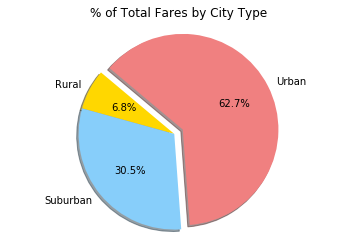

In [52]:
# Calculate Type Percents
grouped_pyber_df = pyber_df.groupby(["type"])
pyber_fares = grouped_pyber_df["fare"].sum()

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Show Pie Chart
plt.pie(pyber_fares, explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

#Tilt the chart to emphasize Urban - FIX THIS
plt.axis("equal")

#Save Chart
plt.savefig("PyberFaresbyCity.png")

In [43]:
# Show Figure
plt.show()

## Total Rides by City Type

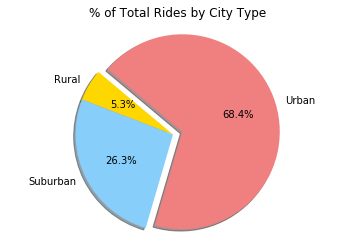

In [64]:
# Calculate Type Percents
grouped_pyber_df = pyber_df.groupby(["type"])
pyber_count = grouped_pyber_df["ride_id"].count()

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Show Pie Chart
plt.pie(pyber_count, explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

#Tilt the chart to emphasize Urban - FIX THIS
plt.axis("equal")

#Save Chart
plt.savefig("PyberRidesbyCity.png")

In [45]:
# Show Figure
plt.show()

## Total Drivers by City Type

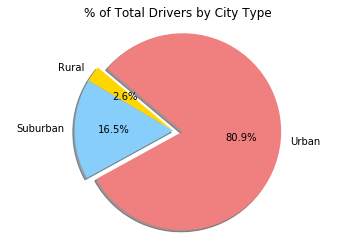

In [69]:
# Calculate Type Percents
pyber_df = pyber_df.drop_duplicates(subset=["city"], keep="first")
grouped_pyber_df = pyber_df.groupby(["type"])
pyber_drivers = grouped_pyber_df["driver_count"].sum()

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Show Pie Chart
plt.pie(pyber_drivers, explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

#Tilt the chart to emphasize Urban - FIX THIS
plt.axis("equal")

#Save Chart
plt.savefig("PyberDriversbyCity.png")

In [70]:
# Show Figure
plt.show()